In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Load the dataset
df = pd.read_csv(r"D:\Machine Learning\ML Algorithms\Datasets\Ice_cream selling data.csv")
print(df.head(3))

# Define features and target
x = df[['Temperature (°C)']]
y = df['Ice Cream Sales (units)']

# Transform features to polynomial features of degree 2
pf = PolynomialFeatures(degree=2)
x_poly = pf.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=42, test_size=0.2)

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Predict on the test set
y_pred = lr.predict(x_test)

   Temperature (°C)  Ice Cream Sales (units)
0         -4.662263                41.842986
1         -4.316559                34.661120
2         -4.213985                39.383001


In [2]:
lr.score(x_test,y_test)

0.843055137193884

C:\Users\a1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


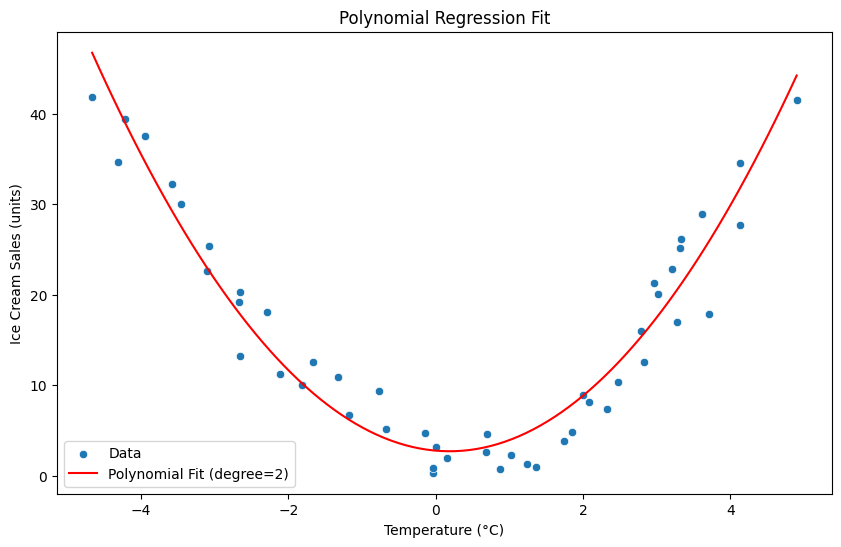

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature (°C)', y='Ice Cream Sales (units)', data=df, label='Data')
x_range = np.linspace(x['Temperature (°C)'].min(), x['Temperature (°C)'].max(), 100)
x_range_poly = pf.transform(x_range.reshape(-1, 1))
y_range_pred = lr.predict(x_range_poly)
plt.plot(x_range, y_range_pred, color='red', label='Polynomial Fit (degree=2)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.title('Polynomial Regression Fit')
plt.show()